# ENOT Lite Framework: Getting Started

This is a minimal example of using ENOT Lite Framework.

In [1]:
# ENOT Lite Framework does not depends on these packages.
# They are used for illustrative purposes.

import inspect
import numpy as np
import mxnet as mx
from PIL import Image
from PIL import ImageDraw
from mxnet.gluon.data.vision import transforms

To import all available backends simply import `backend` module from `enot_lite`:

In [2]:
from enot_lite import backend

Now you can inspect available backends by the following code:

In [3]:
for back, _ in inspect.getmembers(backend, inspect.isclass):
    print(back)

Backend
OrtBackend
OrtCpuBackend
OrtCudaBackend
OrtOpenvinoBackend
OrtOpenvinoFloatBackend
OrtTensorrtBackend
OrtTensorrtFloatBackend
OrtTensorrtFloatOptimBackend


Let's try using `OrtTensorrtFloatBackend` backend for task of image classification.

### Model, labels and image
At first we should download model, labels and image for classification:

In [4]:
mx.test_utils.download('https://media.githubusercontent.com/media/onnx/models/master/vision/classification/squeezenet/model/squeezenet1.1-7.onnx');
mx.test_utils.download('https://s3.amazonaws.com/onnx-model-zoo/synset.txt');
mx.test_utils.download('https://s3.amazonaws.com/model-server/inputs/kitten.jpg');

Open and prepare image that will be classified:

In [5]:
def preprocess(img):
    transform_fn = transforms.Compose(
        [
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]
    )
    img = transform_fn(img)
    img = img.expand_dims(axis=0)
    return img.asnumpy()

image = mx.image.imread('kitten.jpg')
image = preprocess(image)

Get labels from downloaded file:

In [6]:
with open('synset.txt', 'r') as file:
    labels = [line.rstrip() for line in file]

### Backend usage

To construct new backend you need to provide model and (optionally) session options.

In [7]:
sess = backend.OrtTensorrtFloatBackend('squeezenet1.1-7.onnx')

Now, to run inference we have to get the input name of the model by using `get_inputs` method of `backend` class:

In [8]:
input_name = sess.get_inputs()[0].name

Run inference to get prediction by using `run` method of our backend:

In [9]:
scores = sess.run(output_names=None, input_feed={input_name: image})[0]

### Visualize prediction

In [10]:
top_class = labels[np.argsort(np.squeeze(scores))[::-1][0]]

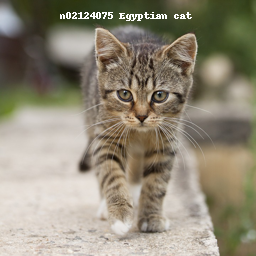

In [11]:
classified = Image.open('kitten.jpg')
classified = classified.resize((256, 256))
draw = ImageDraw.Draw(classified)
draw.text((60, 10), top_class, (255, 255, 255))
display(classified)